In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [ ]:
data = pd.read_csv("/content/bacteria.csv")

In [ ]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


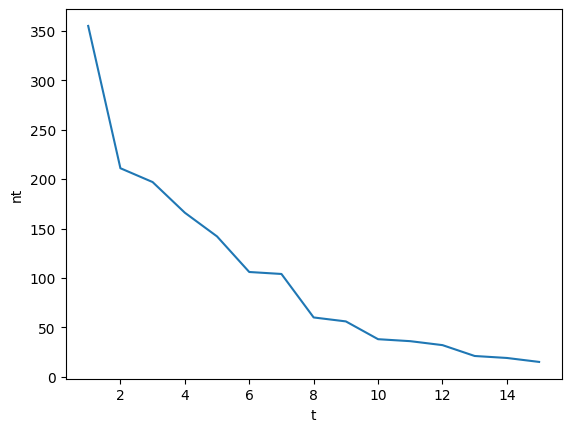

In [ ]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

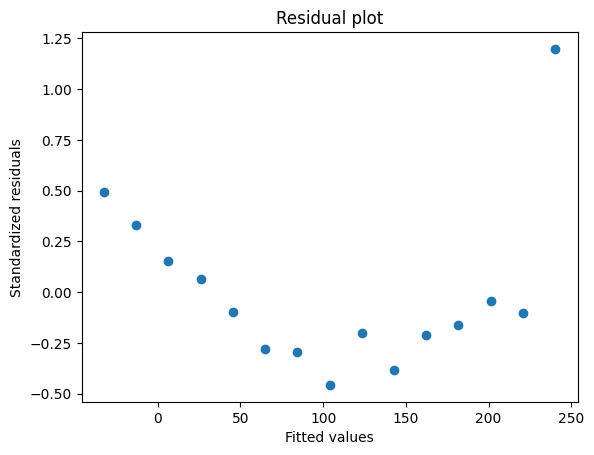

In [ ]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

In [ ]:
# ans :
data['log_nt'] = np.log(data['nt'])

model2 = LinearRegression()
model2.fit(data[['t']], data['log_nt'])

fitted_values2 = model2.predict(data[['t']])
standardized_residuals = (data['log_nt']-fitted_values2) / np.std(data['log_nt'])

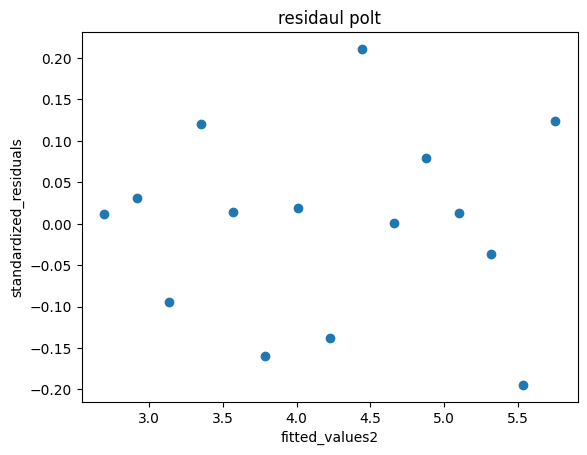

In [ ]:
plt.scatter(fitted_values2, standardized_residuals)
plt.xlabel('fitted_values2')
plt.ylabel('standardized_residuals')
plt.title('residaul polt')
plt.show()

### Q2

In [ ]:
# 데이터 로드
data2 = pd.read_csv("/content/artificial1.csv")

In [ ]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [ ]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [ ]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        11:57:05   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

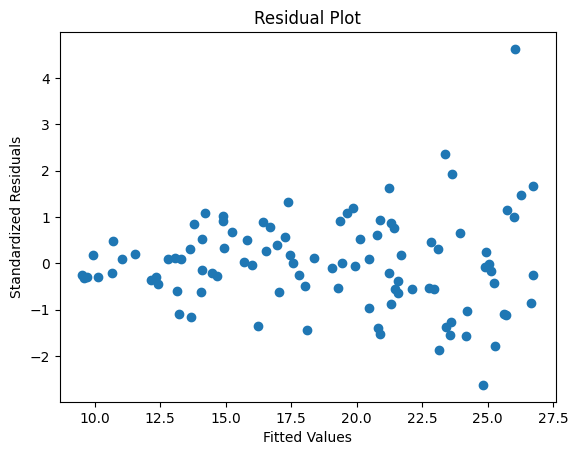

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

In [ ]:
# ans :
data2['log_Y'] = np.log(data2['Y'])

result2 = smf.ols('log_Y~X', data=data2).fit()

fitted_values3 = result2.predict(data2['X'])
standardized_residuals2 = result2.get_influence().resid_studentized_internal

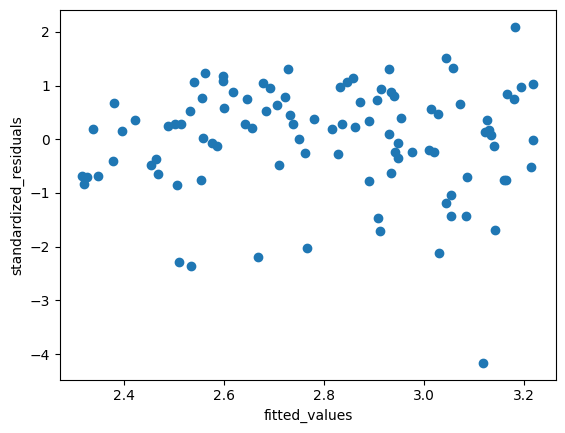

In [ ]:
plt.scatter(fitted_values3, standardized_residuals2)
plt.xlabel('fitted_values')
plt.ylabel('standardized_residuals')
plt.show()

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 회귀 모델이 다양한 X값에 대해 일관된 예측 정확도를 유지할 수 없음
